## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
SGD = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=SGD)

In [7]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True, 
          verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 6s - loss: 1.8525 - acc: 0.3358 - val_loss: 1.6764 - val_acc: 0.4074
Epoch 2/500
 - 3s - loss: 1.6383 - acc: 0.4203 - val_loss: 1.6422 - val_acc: 0.4185
Epoch 3/500
 - 3s - loss: 1.5534 - acc: 0.4490 - val_loss: 1.6371 - val_acc: 0.4185
Epoch 4/500
 - 3s - loss: 1.4890 - acc: 0.4717 - val_loss: 1.5570 - val_acc: 0.4524
Epoch 5/500
 - 3s - loss: 1.4398 - acc: 0.4880 - val_loss: 1.4922 - val_acc: 0.4681
Epoch 6/500
 - 3s - loss: 1.4002 - acc: 0.5051 - val_loss: 1.5400 - val_acc: 0.4495
Epoch 7/500
 - 3s - loss: 1.3613 - acc: 0.5156 - val_loss: 1.4356 - val_acc: 0.4880
Epoch 8/500
 - 3s - loss: 1.3298 - acc: 0.5288 - val_loss: 1.4229 - val_acc: 0.4967
Epoch 9/500
 - 3s - loss: 1.2921 - acc: 0.5405 - val_loss: 1.3802 - val_acc: 0.5119
Epoch 10/500
 - 3s - loss: 1.2703 - acc: 0.5508 - val_loss: 1.3838 - val_acc: 0.5084
Epoch 11/500
 

Epoch 91/500
 - 3s - loss: 0.1281 - acc: 0.9552 - val_loss: 3.1789 - val_acc: 0.5312
Epoch 92/500
 - 3s - loss: 0.1256 - acc: 0.9554 - val_loss: 3.2059 - val_acc: 0.5276
Epoch 93/500
 - 3s - loss: 0.1467 - acc: 0.9468 - val_loss: 3.2780 - val_acc: 0.5255
Epoch 94/500
 - 3s - loss: 0.1449 - acc: 0.9499 - val_loss: 3.0962 - val_acc: 0.5341
Epoch 95/500
 - 3s - loss: 0.1159 - acc: 0.9595 - val_loss: 3.2352 - val_acc: 0.5349
Epoch 96/500
 - 3s - loss: 0.1247 - acc: 0.9551 - val_loss: 3.2036 - val_acc: 0.5329
Epoch 97/500
 - 3s - loss: 0.1009 - acc: 0.9646 - val_loss: 3.1894 - val_acc: 0.5350
Epoch 98/500
 - 3s - loss: 0.1045 - acc: 0.9627 - val_loss: 3.2042 - val_acc: 0.5344
Epoch 99/500
 - 3s - loss: 0.0954 - acc: 0.9668 - val_loss: 3.3524 - val_acc: 0.5333
Epoch 100/500
 - 3s - loss: 0.1458 - acc: 0.9481 - val_loss: 3.3311 - val_acc: 0.5302
Epoch 101/500
 - 3s - loss: 0.1239 - acc: 0.9563 - val_loss: 3.3348 - val_acc: 0.5269
Epoch 102/500
 - 3s - loss: 0.1075 - acc: 0.9630 - val_loss: 3.

Epoch 187/500
 - 3s - loss: 0.0907 - acc: 0.9705 - val_loss: 4.1304 - val_acc: 0.5278
Epoch 188/500
 - 3s - loss: 0.1069 - acc: 0.9655 - val_loss: 4.2290 - val_acc: 0.5216
Epoch 189/500
 - 3s - loss: 0.0497 - acc: 0.9832 - val_loss: 4.0438 - val_acc: 0.5348
Epoch 190/500
 - 3s - loss: 0.0251 - acc: 0.9915 - val_loss: 4.1016 - val_acc: 0.5394
Epoch 191/500
 - 3s - loss: 0.0172 - acc: 0.9945 - val_loss: 4.1849 - val_acc: 0.5316
Epoch 192/500
 - 3s - loss: 0.0203 - acc: 0.9935 - val_loss: 4.1409 - val_acc: 0.5354
Epoch 193/500
 - 3s - loss: 0.0144 - acc: 0.9957 - val_loss: 4.1679 - val_acc: 0.5384
Epoch 194/500
 - 3s - loss: 0.0196 - acc: 0.9935 - val_loss: 4.1192 - val_acc: 0.5401
Epoch 195/500
 - 3s - loss: 0.0114 - acc: 0.9967 - val_loss: 4.1039 - val_acc: 0.5462
Epoch 196/500
 - 3s - loss: 0.0019 - acc: 0.9997 - val_loss: 4.1253 - val_acc: 0.5469
Epoch 197/500
 - 3s - loss: 7.7170e-04 - acc: 1.0000 - val_loss: 4.1546 - val_acc: 0.5445
Epoch 198/500
 - 3s - loss: 7.1159e-04 - acc: 1.00

Epoch 279/500
 - 3s - loss: 8.8137e-05 - acc: 1.0000 - val_loss: 4.2974 - val_acc: 0.5515
Epoch 280/500
 - 3s - loss: 8.7735e-05 - acc: 1.0000 - val_loss: 4.2989 - val_acc: 0.5511
Epoch 281/500
 - 3s - loss: 8.7003e-05 - acc: 1.0000 - val_loss: 4.2992 - val_acc: 0.5516
Epoch 282/500
 - 3s - loss: 8.6426e-05 - acc: 1.0000 - val_loss: 4.3000 - val_acc: 0.5518
Epoch 283/500
 - 3s - loss: 8.5901e-05 - acc: 1.0000 - val_loss: 4.3009 - val_acc: 0.5516
Epoch 284/500
 - 3s - loss: 8.5425e-05 - acc: 1.0000 - val_loss: 4.3015 - val_acc: 0.5522
Epoch 285/500
 - 3s - loss: 8.5038e-05 - acc: 1.0000 - val_loss: 4.3027 - val_acc: 0.5517
Epoch 286/500
 - 3s - loss: 8.4139e-05 - acc: 1.0000 - val_loss: 4.3040 - val_acc: 0.5517
Epoch 287/500
 - 3s - loss: 8.3866e-05 - acc: 1.0000 - val_loss: 4.3044 - val_acc: 0.5516
Epoch 288/500
 - 3s - loss: 8.3664e-05 - acc: 1.0000 - val_loss: 4.3051 - val_acc: 0.5514
Epoch 289/500
 - 3s - loss: 8.2802e-05 - acc: 1.0000 - val_loss: 4.3050 - val_acc: 0.5516
Epoch 290/

 - 3s - loss: 5.6994e-05 - acc: 1.0000 - val_loss: 4.3507 - val_acc: 0.5526
Epoch 371/500
 - 3s - loss: 5.6801e-05 - acc: 1.0000 - val_loss: 4.3509 - val_acc: 0.5524
Epoch 372/500
 - 3s - loss: 5.6662e-05 - acc: 1.0000 - val_loss: 4.3516 - val_acc: 0.5524
Epoch 373/500
 - 3s - loss: 5.6460e-05 - acc: 1.0000 - val_loss: 4.3526 - val_acc: 0.5526
Epoch 374/500
 - 3s - loss: 5.6211e-05 - acc: 1.0000 - val_loss: 4.3528 - val_acc: 0.5529
Epoch 375/500
 - 3s - loss: 5.6080e-05 - acc: 1.0000 - val_loss: 4.3532 - val_acc: 0.5530
Epoch 376/500
 - 3s - loss: 5.5874e-05 - acc: 1.0000 - val_loss: 4.3536 - val_acc: 0.5525
Epoch 377/500
 - 3s - loss: 5.5561e-05 - acc: 1.0000 - val_loss: 4.3534 - val_acc: 0.5526
Epoch 378/500
 - 3s - loss: 5.5476e-05 - acc: 1.0000 - val_loss: 4.3538 - val_acc: 0.5527
Epoch 379/500
 - 3s - loss: 5.5200e-05 - acc: 1.0000 - val_loss: 4.3546 - val_acc: 0.5523
Epoch 380/500
 - 3s - loss: 5.5061e-05 - acc: 1.0000 - val_loss: 4.3549 - val_acc: 0.5528
Epoch 381/500
 - 3s - lo

Epoch 462/500
 - 3s - loss: 4.3330e-05 - acc: 1.0000 - val_loss: 4.3847 - val_acc: 0.5527
Epoch 463/500
 - 3s - loss: 4.3156e-05 - acc: 1.0000 - val_loss: 4.3855 - val_acc: 0.5526
Epoch 464/500
 - 3s - loss: 4.3079e-05 - acc: 1.0000 - val_loss: 4.3852 - val_acc: 0.5527
Epoch 465/500
 - 3s - loss: 4.2972e-05 - acc: 1.0000 - val_loss: 4.3858 - val_acc: 0.5525
Epoch 466/500
 - 3s - loss: 4.2848e-05 - acc: 1.0000 - val_loss: 4.3857 - val_acc: 0.5529
Epoch 467/500
 - 3s - loss: 4.2744e-05 - acc: 1.0000 - val_loss: 4.3857 - val_acc: 0.5529
Epoch 468/500
 - 3s - loss: 4.2639e-05 - acc: 1.0000 - val_loss: 4.3866 - val_acc: 0.5529
Epoch 469/500
 - 3s - loss: 4.2581e-05 - acc: 1.0000 - val_loss: 4.3868 - val_acc: 0.5527
Epoch 470/500
 - 3s - loss: 4.2425e-05 - acc: 1.0000 - val_loss: 4.3873 - val_acc: 0.5529
Epoch 471/500
 - 3s - loss: 4.2284e-05 - acc: 1.0000 - val_loss: 4.3872 - val_acc: 0.5529
Epoch 472/500
 - 3s - loss: 4.2168e-05 - acc: 1.0000 - val_loss: 4.3878 - val_acc: 0.5525
Epoch 473/

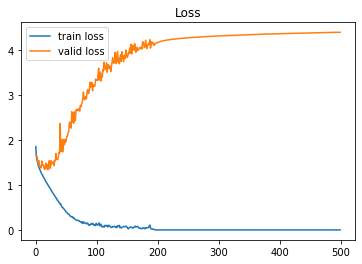

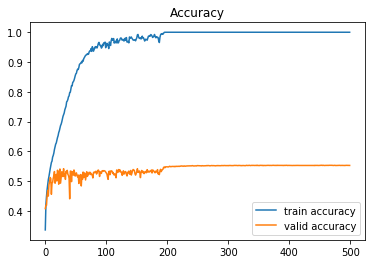

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()